In [ ]:
import openslide
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

: 

In [2]:
base_path = Path('/mnt/z/shared_data/GBM_spatial_transcriptomics')
sample_1512_path = base_path / 'Sample-1512/Images'
tif_1512_A_path = sample_1512_path / '20H214_Al-Holou_GEX_Slide_Square_A.tif'

In [ ]:
# Important to tile (and optionally pyramidize) the tiffs if they aren't yet
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_A.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_A_tiled.tif:none,tile:256x256,pyramid'
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_B.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_B_tiled.tif:none,tile:256x256,pyramid'
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_C.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_C_tiled.tif:none,tile:256x256,pyramid'
# !vips im_vips2tiff /mnt/z/shared_data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_C.tif '../h&e_images/20H214_Al-Holou_GEX_Slide_Square_C_tiled.tif:none,tile:256x256,pyramid'

In [43]:
slide = openslide.OpenSlide('../h&e_images/20H214_Al-Holou_GEX_Slide_Square_A_tiled.tif')

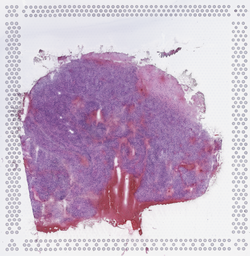

In [44]:
slide.get_thumbnail((256,256))

In [45]:
slide.properties

<_PropertyMap {'aperio.AppMag': '20', 'aperio.DSR ID': 'UHIVACICAPPSPR1', 'aperio.Date': '08/04/20', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '32', 'aperio.Filename': '20H214_Al-Holou_GEX Slide', 'aperio.Focus Offset': '-0.000500', 'aperio.ICC Profile': 'AT2', 'aperio.ImageID': '29693', 'aperio.Left': '15.176449', 'aperio.LineAreaXOffset': '0.030370', 'aperio.LineAreaYOffset': '0.033298', 'aperio.LineCameraSkew': '0.000516', 'aperio.MPP': '0.5034', 'aperio.OriginalHeight': '16818', 'aperio.OriginalWidth': '73152', 'aperio.ScanScope ID': 'ULM-307034', 'aperio.SessonMode': 'NR', 'aperio.StripeWidth': '2032', 'aperio.Time': '09:30:31', 'aperio.Time Zone': 'GMT-04:00', 'aperio.Top': '11.575994', 'aperio.User': '00000000-0000-0000-0000-000000000000', 'openslide.comment': 'Aperio Image Library v12.0.14 \r\n71712x16718 [602,535 15871x15469] (240x240) LZW;Aperio Image Library v12.0.15 \r\n73152x16818 [0,100 71712x16718] (240x240) JPEG/RGB Q=70|Ap

In [47]:
import pyvips

In [50]:
in_img = pyvips.Image.new_from_file(str(tif_1512_A_path))
in_img.tiffsave('../h&e_images/pyvips_test_img_A.tif',
                compression='none',
                tile=True,
                tile_width=256,
                tile_height=256,
                pyramid=True
               )

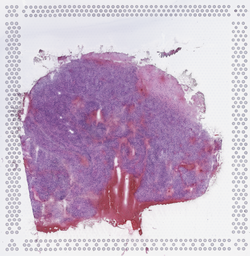

In [52]:
slide2 = openslide.OpenSlide('../h&e_images/pyvips_test_img_A.tif')
slide2.get_thumbnail((256,256))

In [53]:
from normalize_HnE import norm_HnE

In [65]:
slide2.level_dimensions

((15469, 15871),
 (7734, 7935),
 (3867, 3967),
 (1933, 1983),
 (966, 991),
 (483, 495),
 (241, 247))

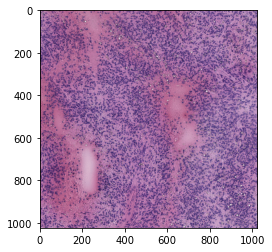

In [68]:
img = slide2.read_region((7800,7900), 1, (1024,1024))
img = img.convert('RGB')
img = np.array(img)

plt.imshow(img)

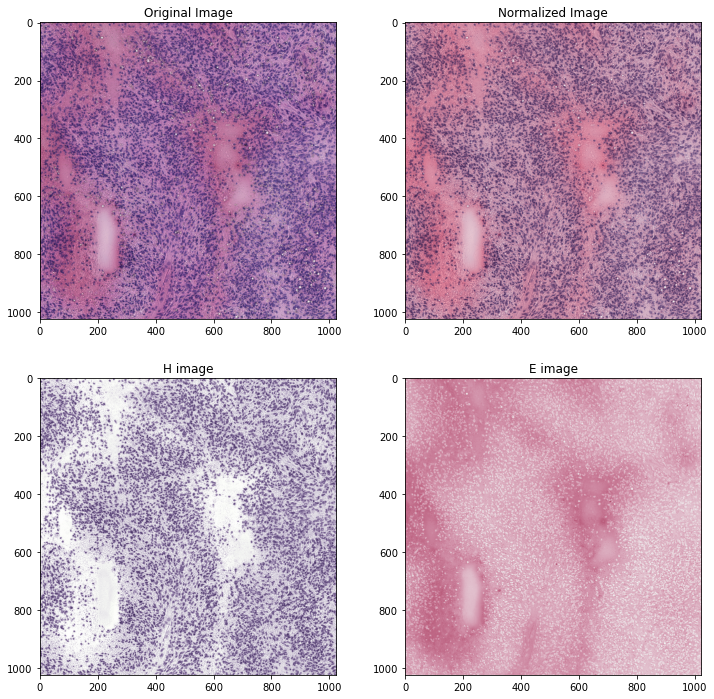

In [69]:
img_norm, h_img, e_img = norm_HnE(img)

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(222)
plt.title('Normalized Image')
plt.imshow(img_norm)
plt.subplot(223)
plt.title('H image')
plt.imshow(h_img)
plt.subplot(224)
plt.title('E image')
plt.imshow(e_img)
plt.show()

In [1]:
import os   
# replace with path to your own vips bin folder
VIPSHOME = 'C:\\Users\\maddoxav\\vips-dev-w64-web-8.12.2\\vips-dev-8.12\\bin'
with os.add_dll_directory(VIPSHOME):
    import pyvips
from pathlib import Path 


In [2]:
data_path = Path("c:/Users/maddoxav/OneDrive - Michigan Medicine/Documents/Rao_Lab/data")
tif_1512_path = data_path / "GBM_spatial_transcriptomics/Sample-1512/Images"
tif_1512_A_path = tif_1512_path / "20H214_Al-Holou_GEX_Slide_Square_A.tif"
wsi_1512_A_path = tif_1512_path / "TP_20H214_Al-Holou_GEX_Slide_Square_A.tif"
in_img = pyvips.Image.new_from_file(str(tif_1512_A_path))


In [3]:
in_img.tiffsave(str(wsi_1512_A_path),
                compression='none',
                tile=True,
                tile_width=256,
                tile_height=256,
                pyramid=True
                )

In [6]:
list(tif_1512_path.glob('*.tif'))
def tile_pyramidize(tif_dir, dest_dir):
    

[WindowsPath('c:/Users/maddoxav/OneDrive - Michigan Medicine/Documents/Rao_Lab/data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_A.tif'),
 WindowsPath('c:/Users/maddoxav/OneDrive - Michigan Medicine/Documents/Rao_Lab/data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_B.tif'),
 WindowsPath('c:/Users/maddoxav/OneDrive - Michigan Medicine/Documents/Rao_Lab/data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_C.tif'),
 WindowsPath('c:/Users/maddoxav/OneDrive - Michigan Medicine/Documents/Rao_Lab/data/GBM_spatial_transcriptomics/Sample-1512/Images/20H214_Al-Holou_GEX_Slide_Square_D.tif'),
 WindowsPath('c:/Users/maddoxav/OneDrive - Michigan Medicine/Documents/Rao_Lab/data/GBM_spatial_transcriptomics/Sample-1512/Images/TP_20H214_Al-Holou_GEX_Slide_Square_A.tif')]

In [1]:
import os
# replace with path to your own openslide bin folder
OPENSLIDE_PATH = 'C:\\Users\\maddoxav\\openslide-win64-20171122\\openslide-win64-20171122\\bin'
with os.add_dll_directory(OPENSLIDE_PATH):
    import openslide 
    from openslide import open_slide